<h1>Insurance Fraud Claims Detection</h1>


# New section

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving insurance_claims.csv to insurance_claims (1).csv


<h1>Reading CSV</h1>

In [ ]:
# Read from CSV file
df = pd.read_csv('insurance_claims.csv')

In [ ]:
# Check the columns using dtypes
print(df.dtypes)

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [ ]:
# Randomly sample 5 records with .sample(5)
df.sample(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
815,215,38,833321,2010-03-01,IN,250/500,500,1405.71,0,465376,...,NO,70700,7070,14140,49490,Volkswagen,Passat,2008,N,NaN
819,356,47,574707,2005-08-23,IN,250/500,2000,1155.97,0,431104,...,?,61490,5590,11180,44720,Dodge,RAM,2009,N,NaN
717,38,28,447226,1994-08-17,OH,500/1000,500,1122.95,4000000,473653,...,YES,74880,12480,12480,49920,Accura,TL,2000,N,NaN
442,152,33,107181,1999-11-14,IN,250/500,500,942.51,0,478981,...,?,70400,6400,19200,44800,Suburu,Legacy,2001,Y,NaN
964,163,37,390256,2009-11-25,IN,500/1000,1000,1200.33,4000000,477631,...,YES,3900,390,780,2730,Volkswagen,Jetta,2008,Y,NaN
637,292,45,808544,1991-02-05,IL,500/1000,1000,1358.91,0,451470,...,?,7370,670,1340,5360,Suburu,Impreza,1997,N,NaN
63,215,42,519312,2008-10-28,OH,500/1000,500,1848.81,0,435489,...,YES,68520,11420,5710,51390,Suburu,Legacy,2003,Y,NaN
45,265,40,430029,2006-08-21,IL,250/500,1000,1454.43,0,459407,...,?,55120,6890,0,48230,Accura,MDX,2002,N,NaN
665,435,60,593466,2006-11-21,OH,500/1000,500,1064.49,5000000,462804,...,?,62880,5240,10480,47160,Mercedes,E400,2007,Y,NaN
770,255,46,760700,2006-11-25,IL,250/500,500,1302.34,0,431532,...,NO,57860,5260,10520,42080,Volkswagen,Jetta,2011,N,NaN


---
<h2>Summary Statistics</h2>

In [ ]:
# Compute summary statistics
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


<h2>Find Missing Values</h2>

In [ ]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [ ]:
#drop _c39 column
df.drop(columns='_c39',inplace=True)

---
<h2>Covariance & Correlation</h2>

In [ ]:
# Compute the covariance and correlation
df.cov()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.325104e+04,970.201810,1.703130e+06,1.888144e+03,1.410315e+02,4.098745e+06,1.476998e+05,2.053193e+04,6.537987e+04,56.525149,1.728322,-0.959327,7.468871,1.887564e+05,3.670575e+04,1.940521e+04,1.326454e+05,-0.202464
age,9.702018e+02,83.544841,1.395997e+05,1.632352e+02,3.214568e+01,3.806326e+05,1.678029e+04,-1.802445e+03,1.892620e+03,5.538026,0.205834,-0.117534,0.531856,1.685908e+04,3.369297e+03,2.685543e+03,1.080424e+04,0.074430
policy_number,1.703130e+06,139599.665361,6.608139e+10,-1.059731e+06,1.416366e+06,5.296036e+09,1.305565e+08,7.023384e+07,-4.095652e+07,201.322010,3518.009337,-961.035852,-3617.161738,-1.222275e+08,-1.099333e+07,-1.324355e+07,-9.799063e+07,-282.988733
policy_deductable,1.888144e+03,163.235235,-1.059731e+06,3.743784e+05,-4.848613e+02,1.527928e+07,1.993895e+05,6.005009e+05,-4.048617e+05,259.175175,31.927928,-11.423423,45.313313,3.689501e+05,1.167917e+05,1.912697e+05,6.088869e+04,96.088088
policy_annual_premium,1.410315e+02,32.145675,1.416366e+06,-4.848613e+02,5.961772e+04,-3.504155e+06,5.664307e+05,-9.349637e+04,1.615803e+05,-2.678940,-11.441581,5.362622,0.632688,5.862176e+04,-2.101409e+04,-1.372875e+04,9.336460e+04,-72.306760
umbrella_limit,4.098745e+06,380632.632633,5.296036e+09,1.527928e+07,-3.504155e+06,5.278077e+12,3.240420e+09,-3.026763e+09,-1.553189e+09,-371415.415415,-49788.788789,42850.850851,-17204.204204,-2.447073e+09,-5.092246e+08,-2.637003e+08,-1.674148e+09,136733.733734
insured_zip,1.476998e+05,16780.292669,1.305565e+08,1.993895e+05,5.664307e+05,3.240420e+09,5.141121e+09,1.259612e+07,9.948976e+07,4124.025754,2005.227796,1687.420324,1578.175520,-6.412337e+07,-6.122698e+06,-2.366451e+06,-5.563422e+07,-14120.443708
capital-gains,2.053193e+04,-1802.445245,7.023384e+07,6.005009e+05,-9.349637e+04,-3.026763e+09,1.259612e+07,7.768588e+08,-3.674132e+07,-3178.586987,1750.552653,1276.184985,-546.757457,1.175952e+07,3.528093e+06,-1.047625e+05,8.336193e+06,5264.676376
capital-loss,6.537987e+04,1892.620220,-4.095652e+07,-4.048617e+05,1.615803e+05,-1.553189e+09,9.948976e+07,-3.674132e+07,7.898403e+08,-4894.551752,-426.512212,-562.812412,-1290.858959,-2.675643e+07,-6.318256e+06,-3.100158e+06,-1.733802e+07,-9571.920821
incident_hour_of_the_day,5.652515e+01,5.538026,2.013220e+02,2.591752e+02,-2.678940e+00,-3.714154e+05,4.124026e+03,-3.178587e+03,-4.894552e+03,48.321586,0.855540,-0.197045,0.050422,3.995424e+04,5.624392e+03,6.021358e+03,2.830849e+04,0.893562


<Axes: >

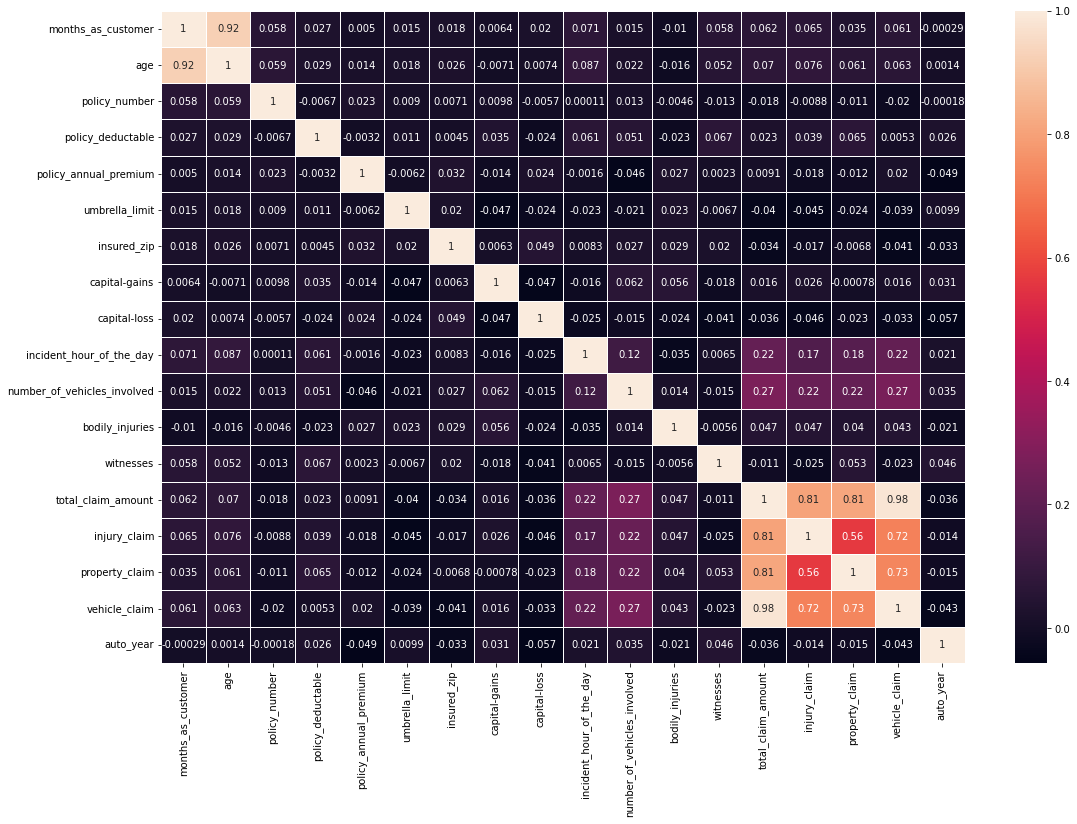

In [ ]:
plt.figure(figsize=(18,12))
corr=df.corr()
sns.heatmap(data=corr,annot=True,fmt='.2g',linewidth=1)

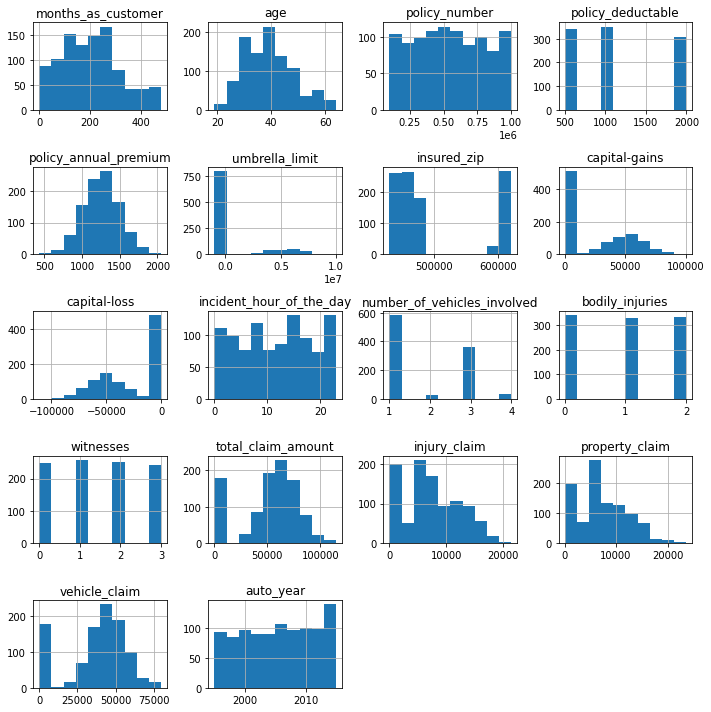

In [ ]:
df.hist(figsize=(10,10))
plt.tight_layout()

<h2>Find Outliers</h2>

In [ ]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


List returns number of outliers in specified columns

In [ ]:
def three_sd_range(series):
    std = series.std()
    mean = series.mean()
    
    low = mean - std * 3
    high = mean + std * 3
    return (low, high)

In [ ]:

sum_list = []
for column in df:
    if column in ['months_as_customer','age','policy_annual_premium','total_claim_amount','injury_claim','property_claim','vehicle_claim']:
        lower, upper = three_sd_range(df[column])
        sum = df[column].loc[pd.DataFrame([df[column] <= lower, df[column] >= upper]).all()].sum()
        sum_list.append(sum)
sum_list

[0, 0, 0.0, 0, 0, 0, 0]

In [ ]:
# drop _c39 column because its useless

# drop cause too many distinct values
df.drop(columns=['policy_number', 'insured_zip', 'incident_location'],inplace=True)

In [ ]:
# get object columns into list
df_col = list(df.select_dtypes(include=['object']).columns)

# creating instance of labelencoder
labelencoder = LabelEncoder()

# loop through df_col
for col in df_col:
    new_col = col + "_encode"
    # Assigning numerical values and storing in another column
    df[new_col] = labelencoder.fit_transform(df[col])

In [ ]:
# drop not encoded columns
df.drop(columns=df_col, inplace=True)
df.shape

(1000, 36)

In [ ]:
# drop correlated columns ('injury_claim', 'property_claim', 'vehicle_claim')
# correlation > 0.81 and the 3 cols == total claim
df.drop(columns=['injury_claim', 'property_claim', 'vehicle_claim'], inplace=True)
df.shape

(1000, 33)

In [ ]:
x = df.drop(columns=['fraud_reported_encode', 'umbrella_limit'])
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
pca_df = pd.DataFrame(principalComponents, columns=["PC1", "PC2", "PC3"])

print('Explained variation:', '{}'.format(pca.explained_variance_ratio_))

Explained variation: [0.36513767 0.32997106 0.30466069]


In [ ]:
X = df [['capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved','total_claim_amount','incident_type_encode', 'collision_type_encode',
       'incident_severity_encode']]
y = df[['fraud_reported_encode']]



---
<h2>Decision Tree</h2>

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=424) # 80% training and 20% test

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy
import sklearn
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print()

print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
      
print()
  
print("Report : ",
classification_report(y_test, y_pred))

print("F1 Score : ",
f1_score(y_test, y_pred))

Accuracy: 0.71

Confusion Matrix:  [[118  34]
 [ 24  24]]

Report :                precision    recall  f1-score   support

           0       0.83      0.78      0.80       152
           1       0.41      0.50      0.45        48

    accuracy                           0.71       200
   macro avg       0.62      0.64      0.63       200
weighted avg       0.73      0.71      0.72       200

F1 Score :  0.4528301886792453


---
<h2>Random Forest</h2>

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=424) # 80% training and 20% test

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

<ipython-input-84-614a6a8c7301>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print()

print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
      
print()
  
print("Report : ",
classification_report(y_test, y_pred))

print("F1 Score : ",
f1_score(y_test, y_pred))



Accuracy: 0.765

Confusion Matrix:  [[128  24]
 [ 23  25]]

Report :                precision    recall  f1-score   support

           0       0.85      0.84      0.84       152
           1       0.51      0.52      0.52        48

    accuracy                           0.77       200
   macro avg       0.68      0.68      0.68       200
weighted avg       0.77      0.77      0.77       200

F1 Score :  0.5154639175257733


<h1>Add SMOTE - Random Forest</h1>

In [ ]:
X = df [['capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved','total_claim_amount','incident_type_encode', 'collision_type_encode',
       'incident_severity_encode']]
y = df[['fraud_reported_encode']]


from imblearn.over_sampling import SMOTE #https://towardsdatascience.com/applying-smote-for-class-imbalance-with-just-a-few-lines-of-code-python-cdf603e58688
sm = SMOTE(random_state=42)
X_s, y_s = sm.fit_resample(X, y)

In [ ]:
# Split dataset into training set and test set
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, y_s, test_size=0.2, random_state=424) # 80% training and 20% test
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_s_train, y_s_train)

y_s_pred = rf.predict(X_s_test)

<ipython-input-88-1f835b5ca418>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_s_train, y_s_train)


In [ ]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_s_test, y_s_pred))

print()

print("Confusion Matrix: ",
        confusion_matrix(y_s_test, y_s_pred))
      
print()
  
print("Report : ",
classification_report(y_s_test, y_s_pred))

print("F1 Score : ",
f1_score(y_s_test, y_s_pred))


Accuracy: 0.8278145695364238

Confusion Matrix:  [[123  34]
 [ 18 127]]

Report :                precision    recall  f1-score   support

           0       0.87      0.78      0.83       157
           1       0.79      0.88      0.83       145

    accuracy                           0.83       302
   macro avg       0.83      0.83      0.83       302
weighted avg       0.83      0.83      0.83       302

F1 Score :  0.8300653594771242


<h1>Add SMOTE - Decision Tree</h1>

In [ ]:
X = df [['capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved','total_claim_amount','incident_type_encode', 'collision_type_encode',
       'incident_severity_encode']]
y = df[['fraud_reported_encode']]


from imblearn.over_sampling import SMOTE #https://towardsdatascience.com/applying-smote-for-class-imbalance-with-just-a-few-lines-of-code-python-cdf603e58688
sm = SMOTE(random_state=42)
X_s, y_s = sm.fit_resample(X, y)

In [ ]:
# Split dataset into training set and test set
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, y_s, test_size=0.2, random_state=424) # 80% training and 20% test

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_s_train,y_s_train)

#Predict the response for test dataset
y_s_pred = clf.predict(X_s_test)

In [ ]:
# Model Accuracy
import sklearn
print("Accuracy:",metrics.accuracy_score(y_s_test, y_s_pred))

print()

print("Confusion Matrix: ",
        confusion_matrix(y_s_test, y_s_pred))
      
print()
  
print("Report : ",
classification_report(y_s_test, y_s_pred))

print("F1 Score : ",
f1_score(y_s_test, y_s_pred))

Accuracy: 0.7615894039735099

Confusion Matrix:  [[109  48]
 [ 24 121]]

Report :                precision    recall  f1-score   support

           0       0.82      0.69      0.75       157
           1       0.72      0.83      0.77       145

    accuracy                           0.76       302
   macro avg       0.77      0.76      0.76       302
weighted avg       0.77      0.76      0.76       302

F1 Score :  0.7707006369426751
